 wget --recursive --no-parent https://tavern.osome.iu.edu/jobs/2023-05-04/

In [1]:
path = '../data/twitter-iu/2023-05-04/tweetContent'

In [9]:
!python -m pip install -U matplotlib

                                              0.0/7.6 MB ? eta -:--:--
     -                                        0.2/7.6 MB 4.8 MB/s eta 0:00:02
     --------                                 1.6/7.6 MB 16.4 MB/s eta 0:00:01
     ---------------------                    4.1/7.6 MB 29.3 MB/s eta 0:00:01
     --------------------------               5.1/7.6 MB 29.6 MB/s eta 0:00:01
     -----------------------------------      6.8/7.6 MB 29.0 MB/s eta 0:00:01
     ---------------------------------------  7.6/7.6 MB 28.6 MB/s eta 0:00:01
     ---------------------------------------- 7.6/7.6 MB 27.1 MB/s eta 0:00:00
                                              0.0/163.0 kB ? eta -:--:--
     -------------------------------------- 163.0/163.0 kB 9.5 MB/s eta 0:00:00
                                              0.0/1.0 MB ? eta -:--:--
     ---------------------------------------- 1.0/1.0 MB 32.3 MB/s eta 0:00:00
                                              0.0/55.4 kB ? eta -:--:--
  

In [2]:
import glob
import gzip
import json

from email.utils import parsedate_tz
from datetime import datetime, timedelta


In [3]:
files = glob.glob(path + '/*.gz')

In [28]:
'''
for file in files: 
    with gzip.open(file, mode='rb') as f:
        file_content = f.read().decode("utf-8") 
        
        outfile = open(file[:-3] + '.txt', 'w', encoding='utf-8')
        outfile.write(file_content)
        outfile.close()
'''

In [5]:
tweets = []
for file in files:
    file_txt = file[:-3] + '.txt'
    for line in open(file_txt, 'r', encoding='utf-8'):
        tweet = json.loads(line)
        tweets.append(tweet)


In [40]:
# tweets[0]

In [5]:
mastodon_topic = []
for tweet in tweets:
    text = tweet['text'].lower()
    if 'mastodon' in text:
        created_at = tweet['created_at']
        user = tweet['user']
        mastodon_topic.append((text, created_at, user))



In [6]:
len(mastodon_topic)

3526

In [20]:
def to_datetime(datestring):
    time_tuple = parsedate_tz(datestring.strip())
    dt = datetime(*time_tuple[:6])
    return dt - timedelta(seconds=time_tuple[-1])

x = []
for tweet in mastodon_topic:
    d = to_datetime(tweet[1])
    month = d.month 
    year = d.year
    week = d.day // 7
    x.append("{}-{}-{}".format(year, month, week))


In [21]:
len(x)

3526

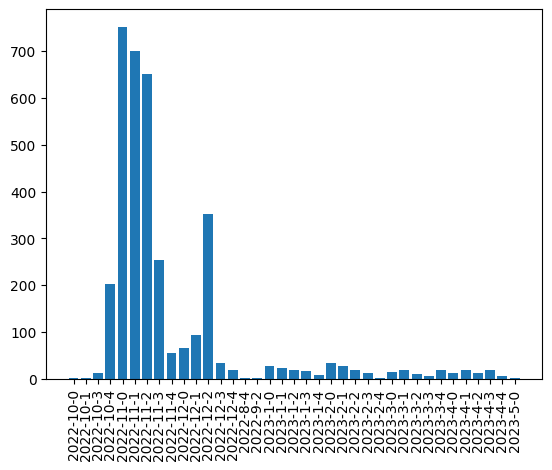

In [24]:
import numpy as np
import matplotlib.pyplot as plt

u, c = np.unique(x, return_counts=True)

_ = plt.bar(u, c)
_ = plt.xticks(rotation=90)